In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt



1.1. Скачать следующие данные: kc-house-data и laptop_price
1.2. Изучите стоимости недвижимости
1.3. Изучите распределение квадратуры жилой
1.4. Изучите распределение года постройки

In [8]:
df = pd.read_csv("kc-house-data (1).csv")
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


1.2. Изучите стоимости недвижимости

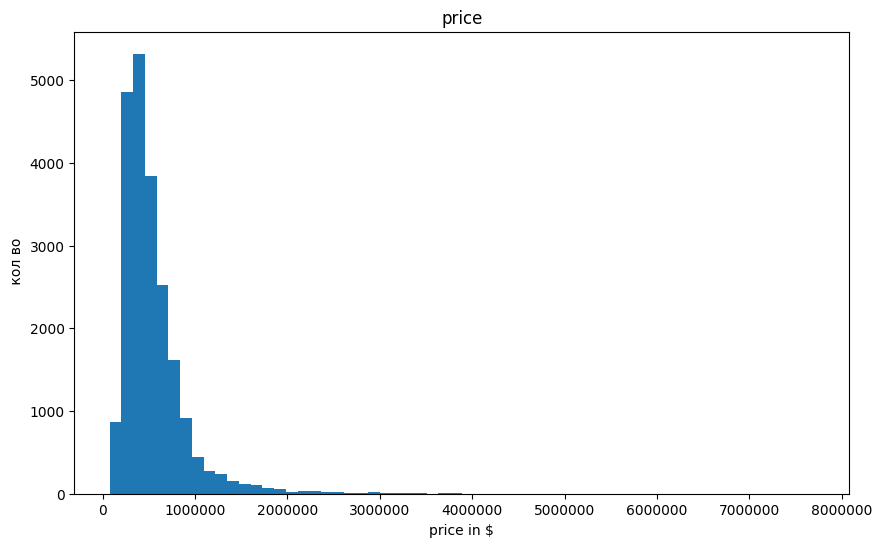

In [16]:
plt.figure(figsize=(10,6))
plt.hist(df['price'],bins=60)
plt.title('price')
plt.xlabel('price in $')
plt.ylabel(' кол во')
plt.ticklabel_format(style='plain')

C:\Users\Рулан\AppData\Local\Temp\ipykernel_9744\3807771688.py:23: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  plt.xlim(0, 10000)  # Устанавливаем пределы оси X для лучшей визуализации


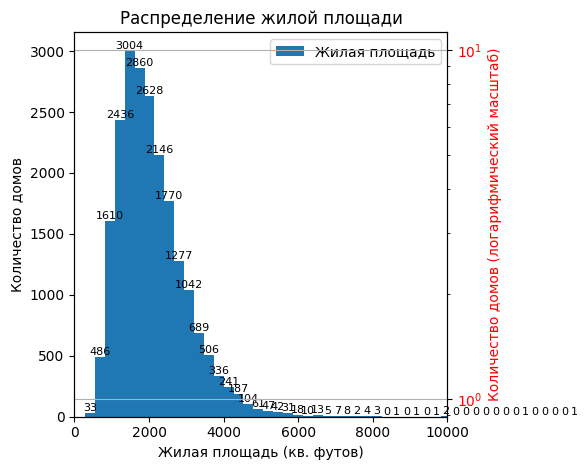

In [17]:

# Построение гистограммы
n, bins, patches = plt.hist(df['sqft_living'], bins=50) 
plt.title('Распределение жилой площади')
plt.xlabel('Жилая площадь (кв. футов)')
plt.ylabel('Количество домов')
plt.ticklabel_format(style='plain')

# Добавляем подписи к каждой корзине
for i in range(len(n)):
    plt.text(bins[i] + (bins[i + 1] - bins[i]) / 2, n[i], str(int(n[i])), ha='center', va='bottom', fontsize=8)

# Добавим легенду 
plt.legend(['Жилая площадь'])

# Разделим ось Y на два масштаба: один для главной части гистограммы, другой для "хвоста"
ax2 = plt.twinx()
ax2.set_ylabel('Количество домов (логарифмический масштаб)', color='red')
ax2.tick_params(axis='y', labelcolor='red')
ax2.semilogy(df['sqft_living'], np.zeros_like(df['sqft_living']), color='red', linestyle='None', marker='o', markersize=0.1) 

# Дополнительные настройки
plt.grid(True)
plt.xlim(0, 10000)  # Устанавливаем пределы оси X для лучшей визуализации
plt.tight_layout()

plt.show()


1. Основное распределение:
   - Большинство домов имеют жилую площадь до 2000 квадратных футов.
   - Наиболее частый диапазон площади – от 1000 до 2000 квадратных футов, где количество домов резко увеличивается и достигает пика около 3000 домов для категории от 1000 до 1500 квадратных футов.

2. Спад:
   - После пика в диапазоне 1000-1500 кв. футов наблюдается спад количества домов с увеличением жилой площади.

3. Длинный хвост:
   - На графике виден длинный правый хвост, что означает наличие небольшого числа домов с очень большой жилой площадью (до 10000 кв. футов), но их количество значительно меньше по сравнению с домами среднего размера.

4. Логарифмическая шкала:
   - Дополнительно используется логарифмическая шкала на правой вертикальной оси для более наглядного отображения распределения домов с крайне большой жилой площадью, что еще раз подтверждает редкость таких домов.

Анализ: 
Большинство домов сконцентрированы в диапазоне от 500 до 2500 квадратных футов. Распределение имеет асимметричный хвост, указывая на то, что несколько домов имеют значительно большую площадь по сравнению с остальными.

Диагармма рассеивания

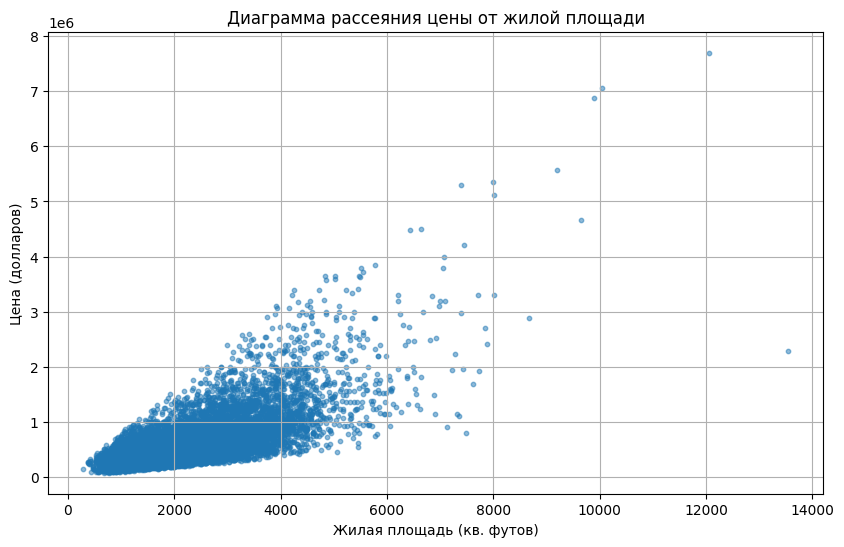

In [18]:
# Построение диаграммы рассеяния
plt.figure(figsize=(10, 6))
plt.scatter(df['sqft_living'], df['price'], s=10, alpha=0.5)

# Настройка подписей осей
plt.title('Диаграмма рассеяния цены от жилой площади')
plt.xlabel('Жилая площадь (кв. футов)')
plt.ylabel('Цена (долларов)')

# Добавление сетки
plt.grid(True)

# Отображение диаграммы
plt.show()

Из данного графика следует, что существует положительная корреляция между жилой площадью (в квадратных футах) и ценой (в долларах) жилья. Чем больше жилая площадь, тем выше стоимость жилья. Однако, разброс цен становится более значительным при увеличении жилой площади, что может указывать на другие факторы, влияющие на цену.

Изучите распределение года постройки


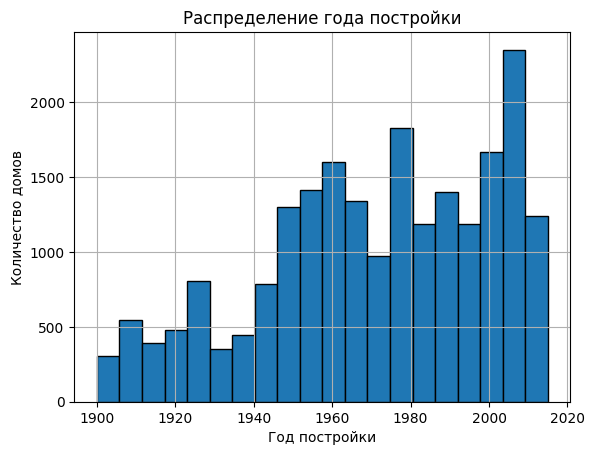

In [19]:
plt.hist(df['yr_built'], bins=20, edgecolor='black')

# Настройка подписей осей
plt.title('Распределение года постройки')
plt.xlabel('Год постройки')
plt.ylabel('Количество домов')

# Добавление сетки
plt.grid(True)

# Отображение гистограммы
plt.show()

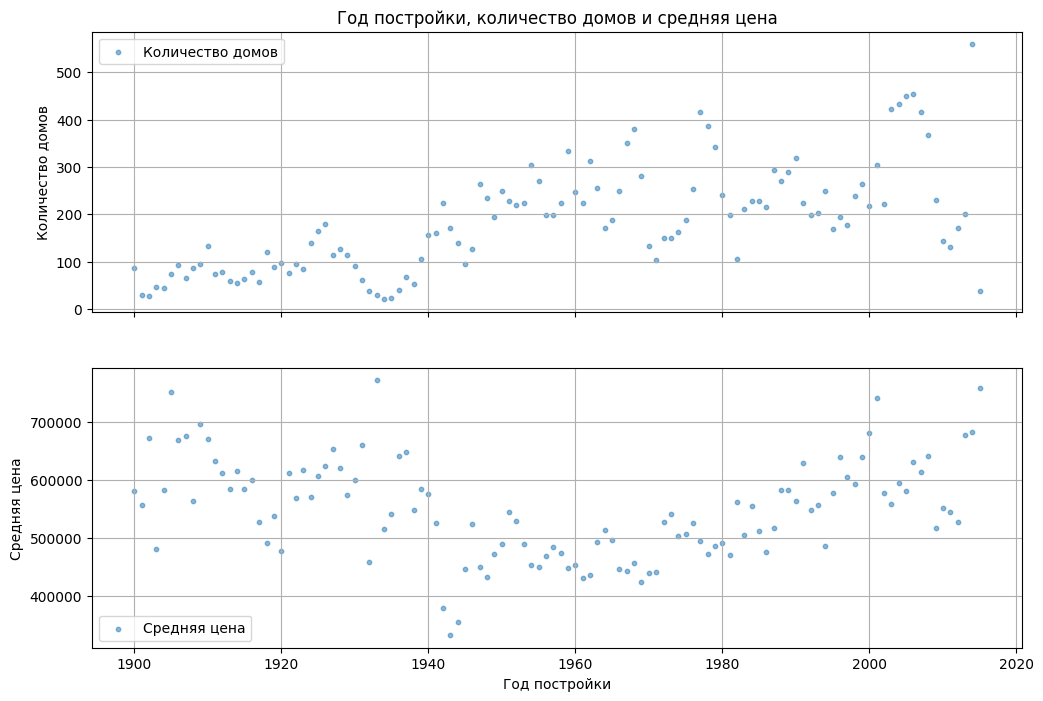

In [23]:
# Группировка данных по году постройки и подсчет количества домов и средней цены
grouped_df = df.groupby('yr_built')['price'].agg(['count', 'mean'])

# Создание подграфиков
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(12, 8))

# Построение графиков
ax1.scatter(grouped_df.index, grouped_df['count'], s=10, alpha=0.5, label='Количество домов')
ax2.scatter(grouped_df.index, grouped_df['mean'], s=10, alpha=0.5, label='Средняя цена')

# Настройка подписей осей
ax1.set_title('Год постройки, количество домов и средняя цена')
ax1.set_ylabel('Количество домов')
ax2.set_ylabel('Средняя цена')
ax2.set_xlabel('Год постройки')

# Добавление легенды
ax1.legend()
ax2.legend()

# Добавление сетки
ax1.grid(True)
ax2.grid(True)

# Отображение диаграммы
plt.show()

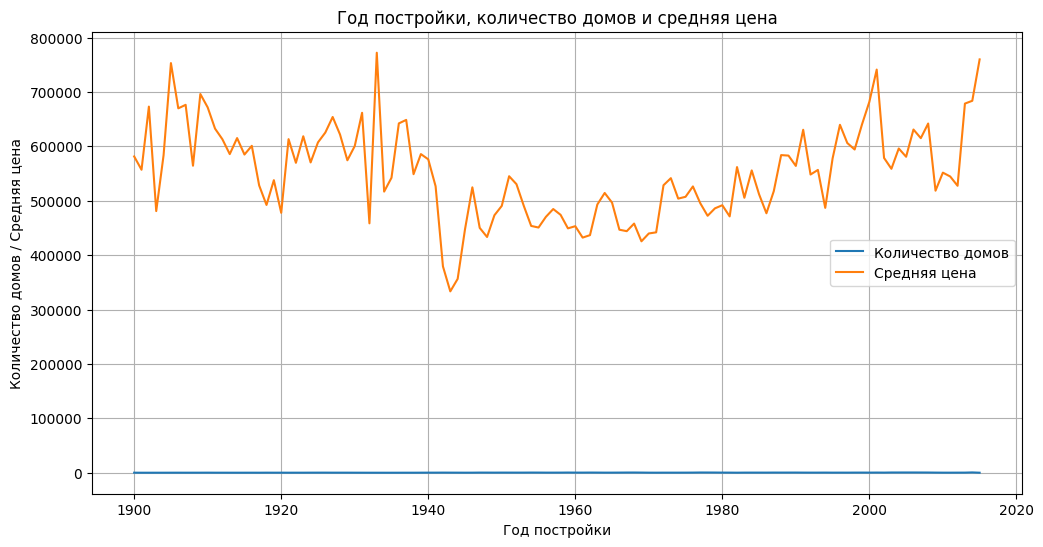

In [21]:
# Группировка данных по году постройки и подсчет количества домов и средней цены
grouped_df = df.groupby('yr_built')['price'].agg(['count', 'mean'])

# Построение диаграммы рассеяния
plt.figure(figsize=(12, 6))
plt.plot(grouped_df.index, grouped_df['count'], label='Количество домов')
plt.plot(grouped_df.index, grouped_df['mean'], label='Средняя цена')

# Настройка подписей осей
plt.title('Год постройки, количество домов и средняя цена')
plt.xlabel('Год постройки')
plt.ylabel('Количество домов / Средняя цена')

# Добавление легенды
plt.legend()

# Добавление сетки
plt.grid(True)

# Отображение диаграммы
plt.show()

Изучите распределение домов от наличия вида на набережную

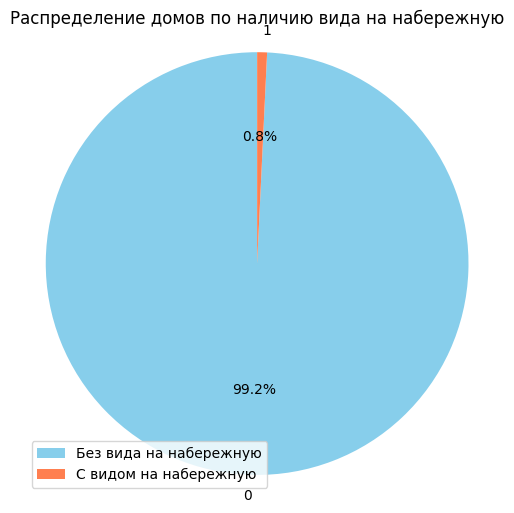

In [25]:
# Группировка данных по наличию вида на набережную и подсчет количества домов
grouped_df = df.groupby('waterfront')['id'].count()

# Цвета для секторов
colors = ['skyblue', 'coral']

# Построение круговой диаграммы
plt.figure(figsize=(6, 6))
plt.pie(grouped_df, labels=grouped_df.index, autopct='%1.1f%%', startangle=90, colors=colors)

# Настройка круговой диаграммы
plt.title('Распределение домов по наличию вида на набережную')
plt.axis('equal')

# Добавление легенды
plt.legend(labels=['Без вида на набережную', 'С видом на набережную'], loc='best')

# Отображение круговой диаграммы
plt.show()

вывод, почти все дома  без вида на набережную


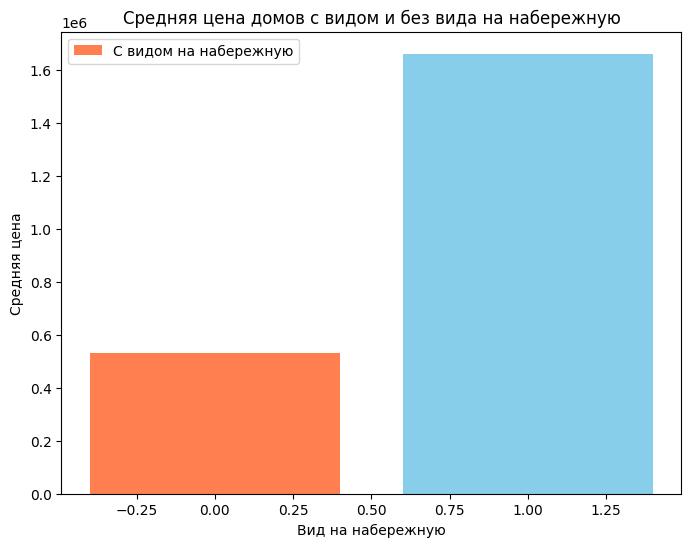

In [26]:
# Группировка данных по наличию вида на набережную и вычисление средней цены
grouped_df = df.groupby('waterfront')['price'].mean()

# Построение столбчатой диаграммы
plt.figure(figsize=(8, 6))
plt.bar(grouped_df.index, grouped_df.values, color=['coral', 'skyblue'])

# Настройка подписей осей
plt.title('Средняя цена домов с видом и без вида на набережную')
plt.xlabel('Вид на набережную')
plt.ylabel('Средняя цена')

# Добавление легенды
plt.legend(labels=['С видом на набережную', 'Без вида на набережную'], loc='best')

# Отображение диаграммы
plt.show()

In [27]:
# Преобразование в DataFrame для удобства вывода
grouped_df = grouped_df.to_frame(name='Средняя цена')

# Добавление столбца "Вид на набережную"
grouped_df['Вид на набережную'] = grouped_df.index.map({0: 'Без вида', 1: 'С видом'})

# Вывод таблицы
print(grouped_df)

            Средняя цена Вид на набережную
waterfront                                
0           5.315636e+05          Без вида
1           1.661876e+06           С видом


распределение этажей домов  

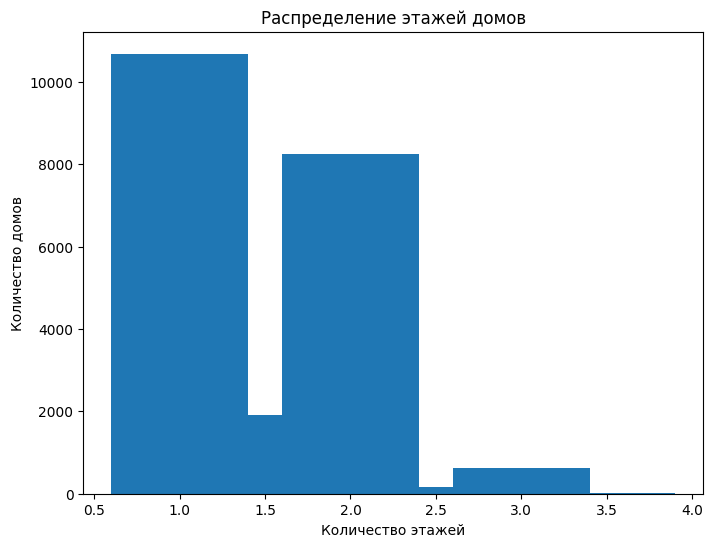

In [28]:
# Группировка данных по количеству этажей и подсчет количества домов
grouped_df = df.groupby('floors')['id'].count()

# Построение столбчатой диаграммы
plt.figure(figsize=(8, 6))
plt.bar(grouped_df.index, grouped_df.values)

# Настройка подписей осей
plt.title('Распределение этажей домов')
plt.xlabel('Количество этажей')
plt.ylabel('Количество домов')

# Отображение диаграммы
plt.show()

объеденим графики

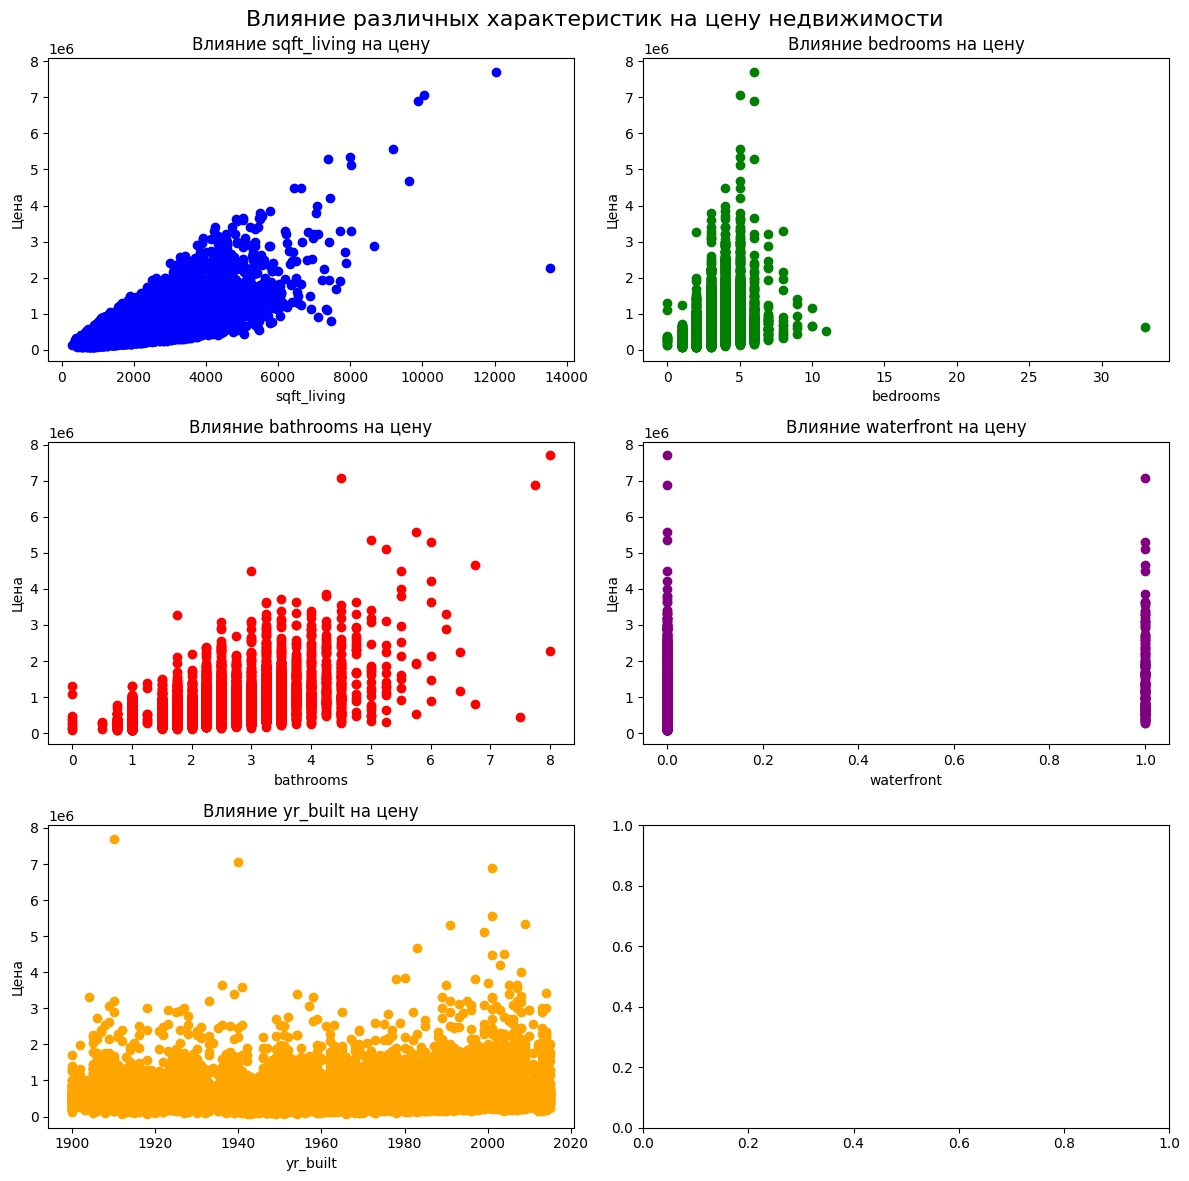

In [29]:
 #Выбираем характеристики, которые хотим визуализировать
features = ['sqft_living', 'bedrooms', 'bathrooms', 'waterfront', 'yr_built']

# Создаем фигуру и оси для графика
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 12))

# Определяем цвета для каждой характеристики
colors = ['blue', 'green', 'red', 'purple', 'orange']

# Цикл по всем выбранным характеристикам
for i, feature in enumerate(features):
    # Определяем строку и столбец для текущей характеристики
    row = i // 2
    col = i % 2
    
    # Строим диаграмму рассеяния
    axes[row, col].scatter(df[feature], df['price'], color=colors[i])
    axes[row, col].set_xlabel(feature)
    axes[row, col].set_ylabel('Цена')
    axes[row, col].set_title(f'Влияние {feature} на цену')

# Устанавливаем общий заголовок для графика
fig.suptitle('Влияние различных характеристик на цену недвижимости', fontsize=16)

# Убираем ненужные оси
plt.tight_layout()

# Отображаем график
plt.show()

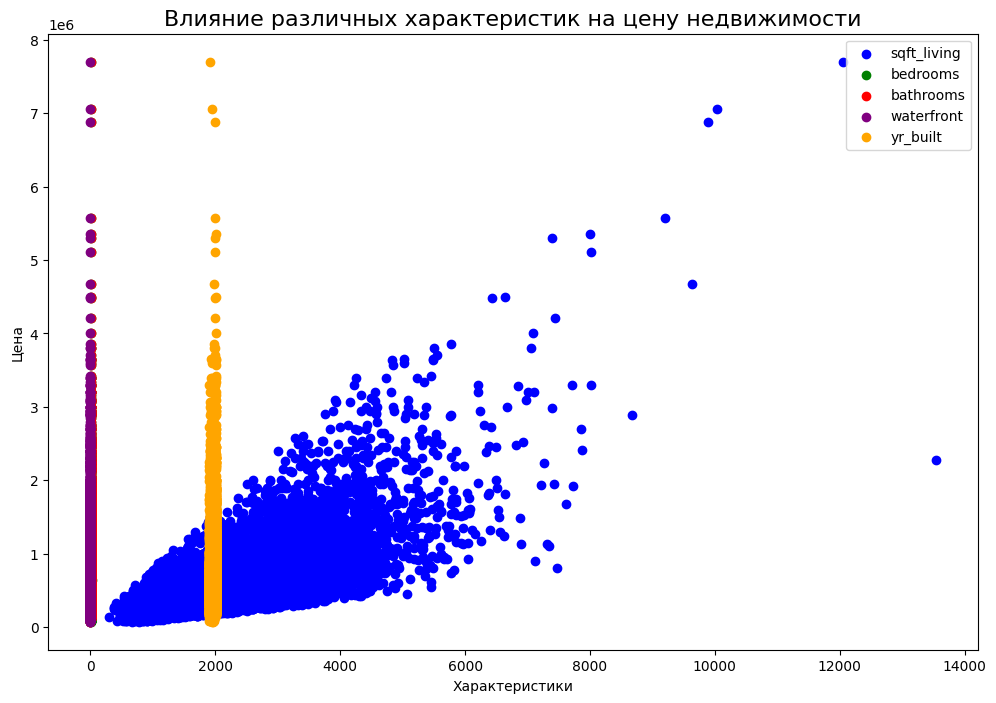

In [30]:
# Выбираем характеристики, которые хотим визуализировать
features = ['sqft_living', 'bedrooms', 'bathrooms', 'waterfront', 'yr_built']

# Создаем фигуру и оси для графика
fig, ax = plt.subplots(figsize=(12, 8))

# Определяем цвета для каждой характеристики
colors = ['blue', 'green', 'red', 'purple', 'orange']

# Цикл по всем выбранным характеристикам
for i, feature in enumerate(features):
    # Строим диаграмму рассеяния
    ax.scatter(df[feature], df['price'], color=colors[i], label=feature)

# Устанавливаем общий заголовок для графика
ax.set_title('Влияние различных характеристик на цену недвижимости', fontsize=16)
ax.set_xlabel('Характеристики')
ax.set_ylabel('Цена')

# Добавляем легенду
ax.legend()

# Отображаем график
plt.show()

На основании данного графика можно сделать вывод о том, что характеристика "sqft_living" (площадь жилья) имеет значительное влияние на цену недвижимости, так как точки, представляющие эту характеристику (синие) показывают явную положительную корреляцию между площадью и ценой. Остальные характеристики ("bedrooms", "bathrooms", "waterfront", "yr_built") также оказывают влияние, но не столь выраженное.